# New classification: Sequential Model

In [1]:
import numpy as np
import pandas as pd 
import os
import itertools
import os
import re

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras


C:\Users\bsooral\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bsooral\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bsooral\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bsooral\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

# fetch data

In [36]:
path = "C:/Users/bsooral/PycharmProjects/topicDetectFlask/data/20news-18828"
allFolders = os.listdir(path)
df = []
for fldr in allFolders:
    allFiles = os.listdir(path+"/"+fldr)
    for fls in allFiles:
        with open(path+"/"+fldr+"/"+fls, "r") as f:
            d = {"category":str(fldr),"text":f.read()}
        df.append(d)
data = pd.DataFrame(df)
data = data.sample(frac = 1).reset_index(drop=True)
data.head()

,category,text
0,talk.politics.mideast,From: josip@eng.umd.edu (Josip Loncaric)\nSubj...
1,talk.religion.misc,From: mlee@post.RoyalRoads.ca (Malcolm Lee)\nS...
2,sci.med,From: mcovingt@aisun4.ai.uga.edu (Michael Covi...
3,comp.windows.x,From: apara@ctp.com (Atul Parasnis)\nSubject: ...
4,rec.autos,From: jchen@wind.bellcore.com (Jason Chen)\nSu...


In [37]:
data3 = pd.read_json("C:/Users/bsooral/PycharmProjects/topicDetectFlask/data/News_Category_Dataset_v2.json", lines = True) 

In [38]:
data3.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [39]:
data3["text"] = data3.headline+data3.short_description

In [40]:
data2 = pd.read_csv("C:/Users/bsooral/PycharmProjects/topicDetectFlask/bbc-text.csv")
frames = [data, data2,data3[["category","text"]]]
data = pd.concat(frames)
data = data.sample(frac = 1).reset_index(drop=True)
data.category = data.category.apply(lambda x: x.lower())
data.head()

,category,text
0,politics,Lindsey Graham Was The Butt Of Jon Stewart's J...
1,entertainment,'Neighbors' Moves In Ahead Of 'Spider-Man' At ...
2,style & beauty,Selita Ebanks: Look Of The DayGetty Images WHE...
3,wellness,6 Strategies for Coping With an Irritable Swee...
4,world news,Even The Bottom Of The World's Deepest Ocean T...


In [41]:
data[data.category == 'weddings']['text']

97        Emmy Fashion: Celebs Looked Positively Bridal ...
120       Wedding DIYs For BridesmaidsWedding expert Abb...
192       Woman Wins Fake Contest and Receives an Underw...
217       Father-Daughter Dance: Bride And Her Dad Perfo...
279       College Football Schedules Holding Up Wedding ...
                                ...                        
221771    To Tweet or Not to Tweet at Your WeddingLet's ...
221791    Online Dating, Stylin' and Profiln' -- 2014 Is...
221812    TV Show Proposals: 8 Of The Best Fictional TV ...
221825    Forget Romance: Relationships Need to Get Cont...
221860    5 Tips To Cut Wedding CostsWeddings are big bu...
Name: text, Length: 3651, dtype: object

In [42]:
data.category.unique()

array(['politics', 'entertainment', 'style & beauty', 'wellness',
       'world news', 'healthy living', 'queer voices', 'worldpost',
       'black voices', 'rec.motorcycles', 'impact', 'travel', 'science',
       'religion', 'green', 'sports', 'food & drink', 'alt.atheism',
       'comedy', 'tech', 'business', 'sci.space', 'rec.autos', 'women',
       'parenting', 'home & living', 'media', 'the worldpost', 'divorce',
       'taste', 'environment', 'talk.politics.guns', 'fifty', 'education',
       'weddings', 'parents', 'arts & culture', 'culture & arts',
       'sci.crypt', 'weird news', 'money', 'sport', 'crime',
       'comp.sys.mac.hardware', 'rec.sport.baseball',
       'soc.religion.christian', 'college', 'talk.politics.misc', 'style',
       'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'misc.forsale', 'comp.sys.ibm.pc.hardware', 'good news',
       'comp.windows.x', 'arts', 'latino voices', 'talk.politics.mideast',
       'talk.religion.misc', 'sci.med

## Cleaning

In [43]:
def replace_cat(y):
    if ((y == 'talk.politics.mideast') or (y == 'talk.politics.guns') or (y == 'talk.politics.misc')):
        return 'politics'
    if ((y == 'rec.sport.hockey') or (y == 'rec.sport.baseball') or (y == 'sport')):
        return 'sports'
    if ((y == 'tech') or (y == 'sci.med') or (y == 'science') or (y == 'sci.space') or (y == 'sci.crypt') or (y == 'sci.electronics')):
        return 'science_and_tech'
    if ((y == 'comp.os.ms-windows.misc') or (y == 'comp.sys.mac.hardware') or (y == 'comp.sys.ibm.pc.hardware') or (y == 'comp.windows.x') or (y == 'comp.graphics')):
        return 'computers'
    if ((y == 'rec.motorcycles') or (y == 'rec.autos')):
        return 'automobiles'
    if ((y == 'alt.atheism') or (y == 'talk.religion.misc') or (y == 'soc.religion.christian')):
        return 'religion'
    if ((y == 'culture & arts') or (y == 'arts & culture') or (y == 'arts')):
        return 'arts & culture'
    if ((y == 'black voices') or (y == 'latino voices')):
        return 'voices'    
    if ((y == 'worldpost') or (y == 'the worldpost')):
        return 'worldpost'    
    if ((y == 'green') or (y == 'environment')):
        return 'environment'     
    if ((y == 'weddings') or (y == 'divorce')):
        return 'relationship'      
    if (y == 'misc.forsale'):
        return 'misc'
    else:
        return y

In [44]:
data['category'] = data['category'].apply(lambda x: replace_cat(x))

In [45]:
data.category.unique()

array(['politics', 'entertainment', 'style & beauty', 'wellness',
       'world news', 'healthy living', 'queer voices', 'worldpost',
       'voices', 'automobiles', 'impact', 'travel', 'science_and_tech',
       'religion', 'environment', 'sports', 'food & drink', 'comedy',
       'business', 'women', 'parenting', 'home & living', 'media',
       'relationship', 'taste', 'fifty', 'education', 'parents',
       'arts & culture', 'weird news', 'money', 'crime', 'computers',
       'college', 'style', 'misc', 'good news'], dtype=object)

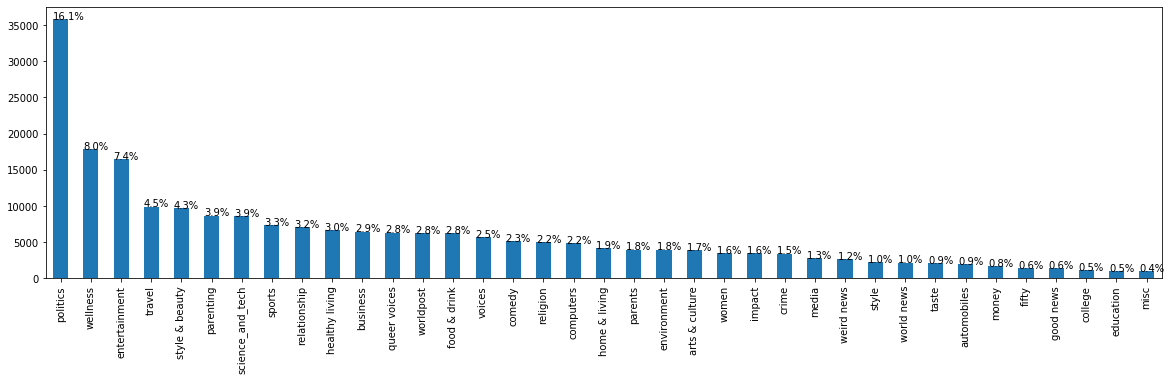

In [46]:
news_count = data['category'].value_counts()
news_percent = [len(data[data['category'] == news_cat]) / len(data) * 100 for news_cat in news_count.index]

ax = news_count.plot(kind='bar', figsize=(20, 5))
for idx, p in enumerate(ax.patches):
    h = p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(news_percent[idx]), (x, y + h + 0.01))

In [47]:
import re

from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
stop_words = set(stopwords.words("english"))

def cleanUpSentence(r, stop_words = stop_words):
    r = re.sub(strip_special_chars, " ", r.lower())
    r = re.sub('[0-9]+', ' ', r)
    if stop_words is not None:
        words = word_tokenize(r)
        filtered_sentence = []
        for w in words:
            w = lemmatizer.lemmatize(w)
            if ((w not in stop_words) and (len(w)<8) and (len(w)>2)):
                filtered_sentence.append(w)
        return " ".join(filtered_sentence)
    else:
        return r

In [62]:
data["text"] = data["text"].apply(lambda x: cleanUpSentence(x))

In [63]:
data["text"]

0                     crazy way beauty blogger growing hair
1         chrissy teigen spill first detail new baby boy...
2         bank anger parent onlies say really mom two ki...
3         msopher vaxc stevens tech edu subject phils st...
4         labor day scam keep poor day rip labor instead...
                                ...                        
221901    dan savage thrice kim davis waiting cash jesus...
221902    clamen cmu edu stewart clamen subject cnn toni...
221903    hind cmgm edu hind subject sale two pair like ...
221904    meryl streep flub jimmy kimmel academy award quiz
221905         scott walker federal income tax sound pretty
Name: text, Length: 221906, dtype: object

In [64]:
data.to_pickle("./news_data.pkl")
#data = pd.read_pickle("./data.pkl")

In [65]:
max_words = 20000
max_len = 125

In [66]:
from sklearn.model_selection import train_test_split
data = data.sample(frac = 1).reset_index(drop=True)
train_text, test_text, train_cat, test_cat = train_test_split(data['text'].values, data['category'].values, test_size=0.2)

In [67]:
max_words = 20000
OOV_TOK = '<OOV>'
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data["text"]) # fit tokenizer to our training text data

In [68]:
x_train = tokenizer.texts_to_sequences(train_text)
x_test = tokenizer.texts_to_sequences(test_text)

In [69]:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [70]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (177524, 125)
x_test shape: (44382, 125)
y_train shape: (177524, 37)
y_test shape: (44382, 37)


# Embedding

In [71]:
vocab_size = len(tokenizer.word_index)+1

In [57]:
GLOVE_DIR = "C:/Users/bsooral/PycharmProjects/topicDetectFlask/glove.6B.300d.txt"
embeddings_index = {}
f = open(GLOVE_DIR,encoding="utf8")
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(word)
        pass
f.close()
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [72]:
embed_size = 300
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embed_size))
absent_words = 0
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        absent_words += 1

# Modeling

In [73]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding

In [74]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embedding_matrix], input_length=max_len))
#model.add(Embedding(vocab_size, vector_dim, input_length=max_len))
model.add(LSTM(num_classes,activation="tanh",input_shape=(max_len, embed_size), return_sequences = False))
model.add(Dense(num_classes,activation="softmax"))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model Summary")
print(model.summary())

Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 125, 300)          30940200  
_________________________________________________________________
lstm_2 (LSTM)                (None, 37)                50024     
_________________________________________________________________
dense_2 (Dense)              (None, 37)                1406      
Total params: 30,991,630
Trainable params: 30,991,630
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#history = model.fit(x_train, y_train, epochs=10, batch_size=2056, validation_data=(x_test, y_test), verbose=1)

In [79]:
from keras import layers
from keras import layers, Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
embedding_dim = 300

model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embedding_matrix], input_length=max_len))
model.add(layers.Conv1D(embed_size, 64, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)
# Fit model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es],
                    validation_data=(x_test, y_test),
                    batch_size=512)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 125, 300)          30940200  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 62, 300)           5760300   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                4816      
_________________________________________________________________
dense_6 (Dense)              (None, 37)                629       
Total params: 36,705,945
Trainable params: 36,705,945
Non-trainable params: 0
_________________________________________________________________
None
Train on 177524 samples, validate on 44382 samples
Epoch 1/20
  7168/177524 [>.........................

KeyboardInterrupt: 

In [ ]:
model.save('TopicClassifier.h5')

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
query = "Following his stunning retirement after his most recent title defense, tributes have poured in to praise the undefeated Ultimate Fighting Championship (UFC) career of Khabib Nurmagomedov.After defeating Justin Gaethje at UFC 254 to defend his lightweight title, Nurmagomedov announced he would retire with a perfect 29-0 career record and 13-0 UFC record."
query = cleanUpSentence(query)
query = tokenizer.texts_to_sequences([query])
query = pad_sequences(query, maxlen=max_len, padding='pre')
prediction = model.predict(np.array(query))
text_labels = encoder.classes_ 
text_labels[np.argmax(prediction)]

In [ ]:
actual = []
predicted = []
for i in range(1,150):
    query = test_text[i]
    actual.append(test_cat[i])
    query = cleanUpSentence(query)
    query = tokenizer.texts_to_sequences([query])
    query = pad_sequences(query, maxlen=max_len, padding='pre')
    prediction = model.predict(np.array(query))
    text_labels = encoder.classes_ 
    predicted.append(text_labels[np.argmax(prediction)])  
    

In [ ]:
d = {"actual":actual, "pred": predicted}
cfm = pd.DataFrame(d)

In [ ]:
cfm.actual.unique()

In [ ]:
for i in cfm.actual.unique():    
    print(i,100*len(cfm[(cfm.actual == i) & (cfm.pred == i)])/len(cfm[cfm.actual == i]))